In [1]:
import importlib

# # First, import module objects
import AbstractCircuit
import DShor
import help_function
import FundamentalOperations
import AbstractRegister
from random import getrandbits
import QPU
import matplotlib.pyplot as plt

# Then reload the modules (if you're updating code dynamically)
importlib.reload(AbstractRegister)
importlib.reload(AbstractCircuit)
importlib.reload(DShor)
importlib.reload(help_function)
importlib.reload(FundamentalOperations)
importlib.reload(QPU)

# Finally, import names into the current namespace
from AbstractCircuit import *
from DShor import *
from help_function import *
from QPU import *
import AbstractGate
from CircuitDrawer import CircuitDrawer

%load_ext autoreload
%autoreload 2

In [2]:
from dataclasses import dataclass

@dataclass
class GateCost:
    def __init__(self, tM, tT, tInter):
        self.tM = tM
        self.tT = tT
        self.tInter = tInter

In [7]:
# allocate 10 exponent qubits and 2000 data qubits
Ne = 10
N = 8
num_QPU = 4

## Use this setting to draw the circuit
Ne = 10
N = 1000
num_QPU = 10
table = {}
# for i in range(2**Ne):
#     num = getrandbits(N)
#     table[i] = num
table[0] = getrandbits(N)
table[500] = getrandbits(N)
table[1000] = getrandbits(N)

0
defaultdict(<class 'list'>, {0: [<AbstractRegister.DataRegister object at 0x000000002ADAAD90>, <AbstractRegister.DataRegister object at 0x000000002ADAA250>], 1: [<AbstractRegister.DataRegister object at 0x000000002ADAA150>, <AbstractRegister.DataRegister object at 0x000000002ADAA910>], 2: [<AbstractRegister.DataRegister object at 0x000000002ADAA950>, <AbstractRegister.DataRegister object at 0x000000002ADAB010>], 3: [<AbstractRegister.DataRegister object at 0x000000002ADAAAD0>, <AbstractRegister.DataRegister object at 0x000000002ADAA810>], 4: [<AbstractRegister.DataRegister object at 0x000000002ADAA890>, <AbstractRegister.DataRegister object at 0x000000002ADAB110>], 5: [<AbstractRegister.DataRegister object at 0x000000002ADAAC10>, <AbstractRegister.DataRegister object at 0x000000002ADAB310>], 6: [<AbstractRegister.DataRegister object at 0x000000002ADAAA50>, <AbstractRegister.DataRegister object at 0x000000002ADAB490>], 7: [<AbstractRegister.DataRegister object at 0x000000002ADAAB10>, 

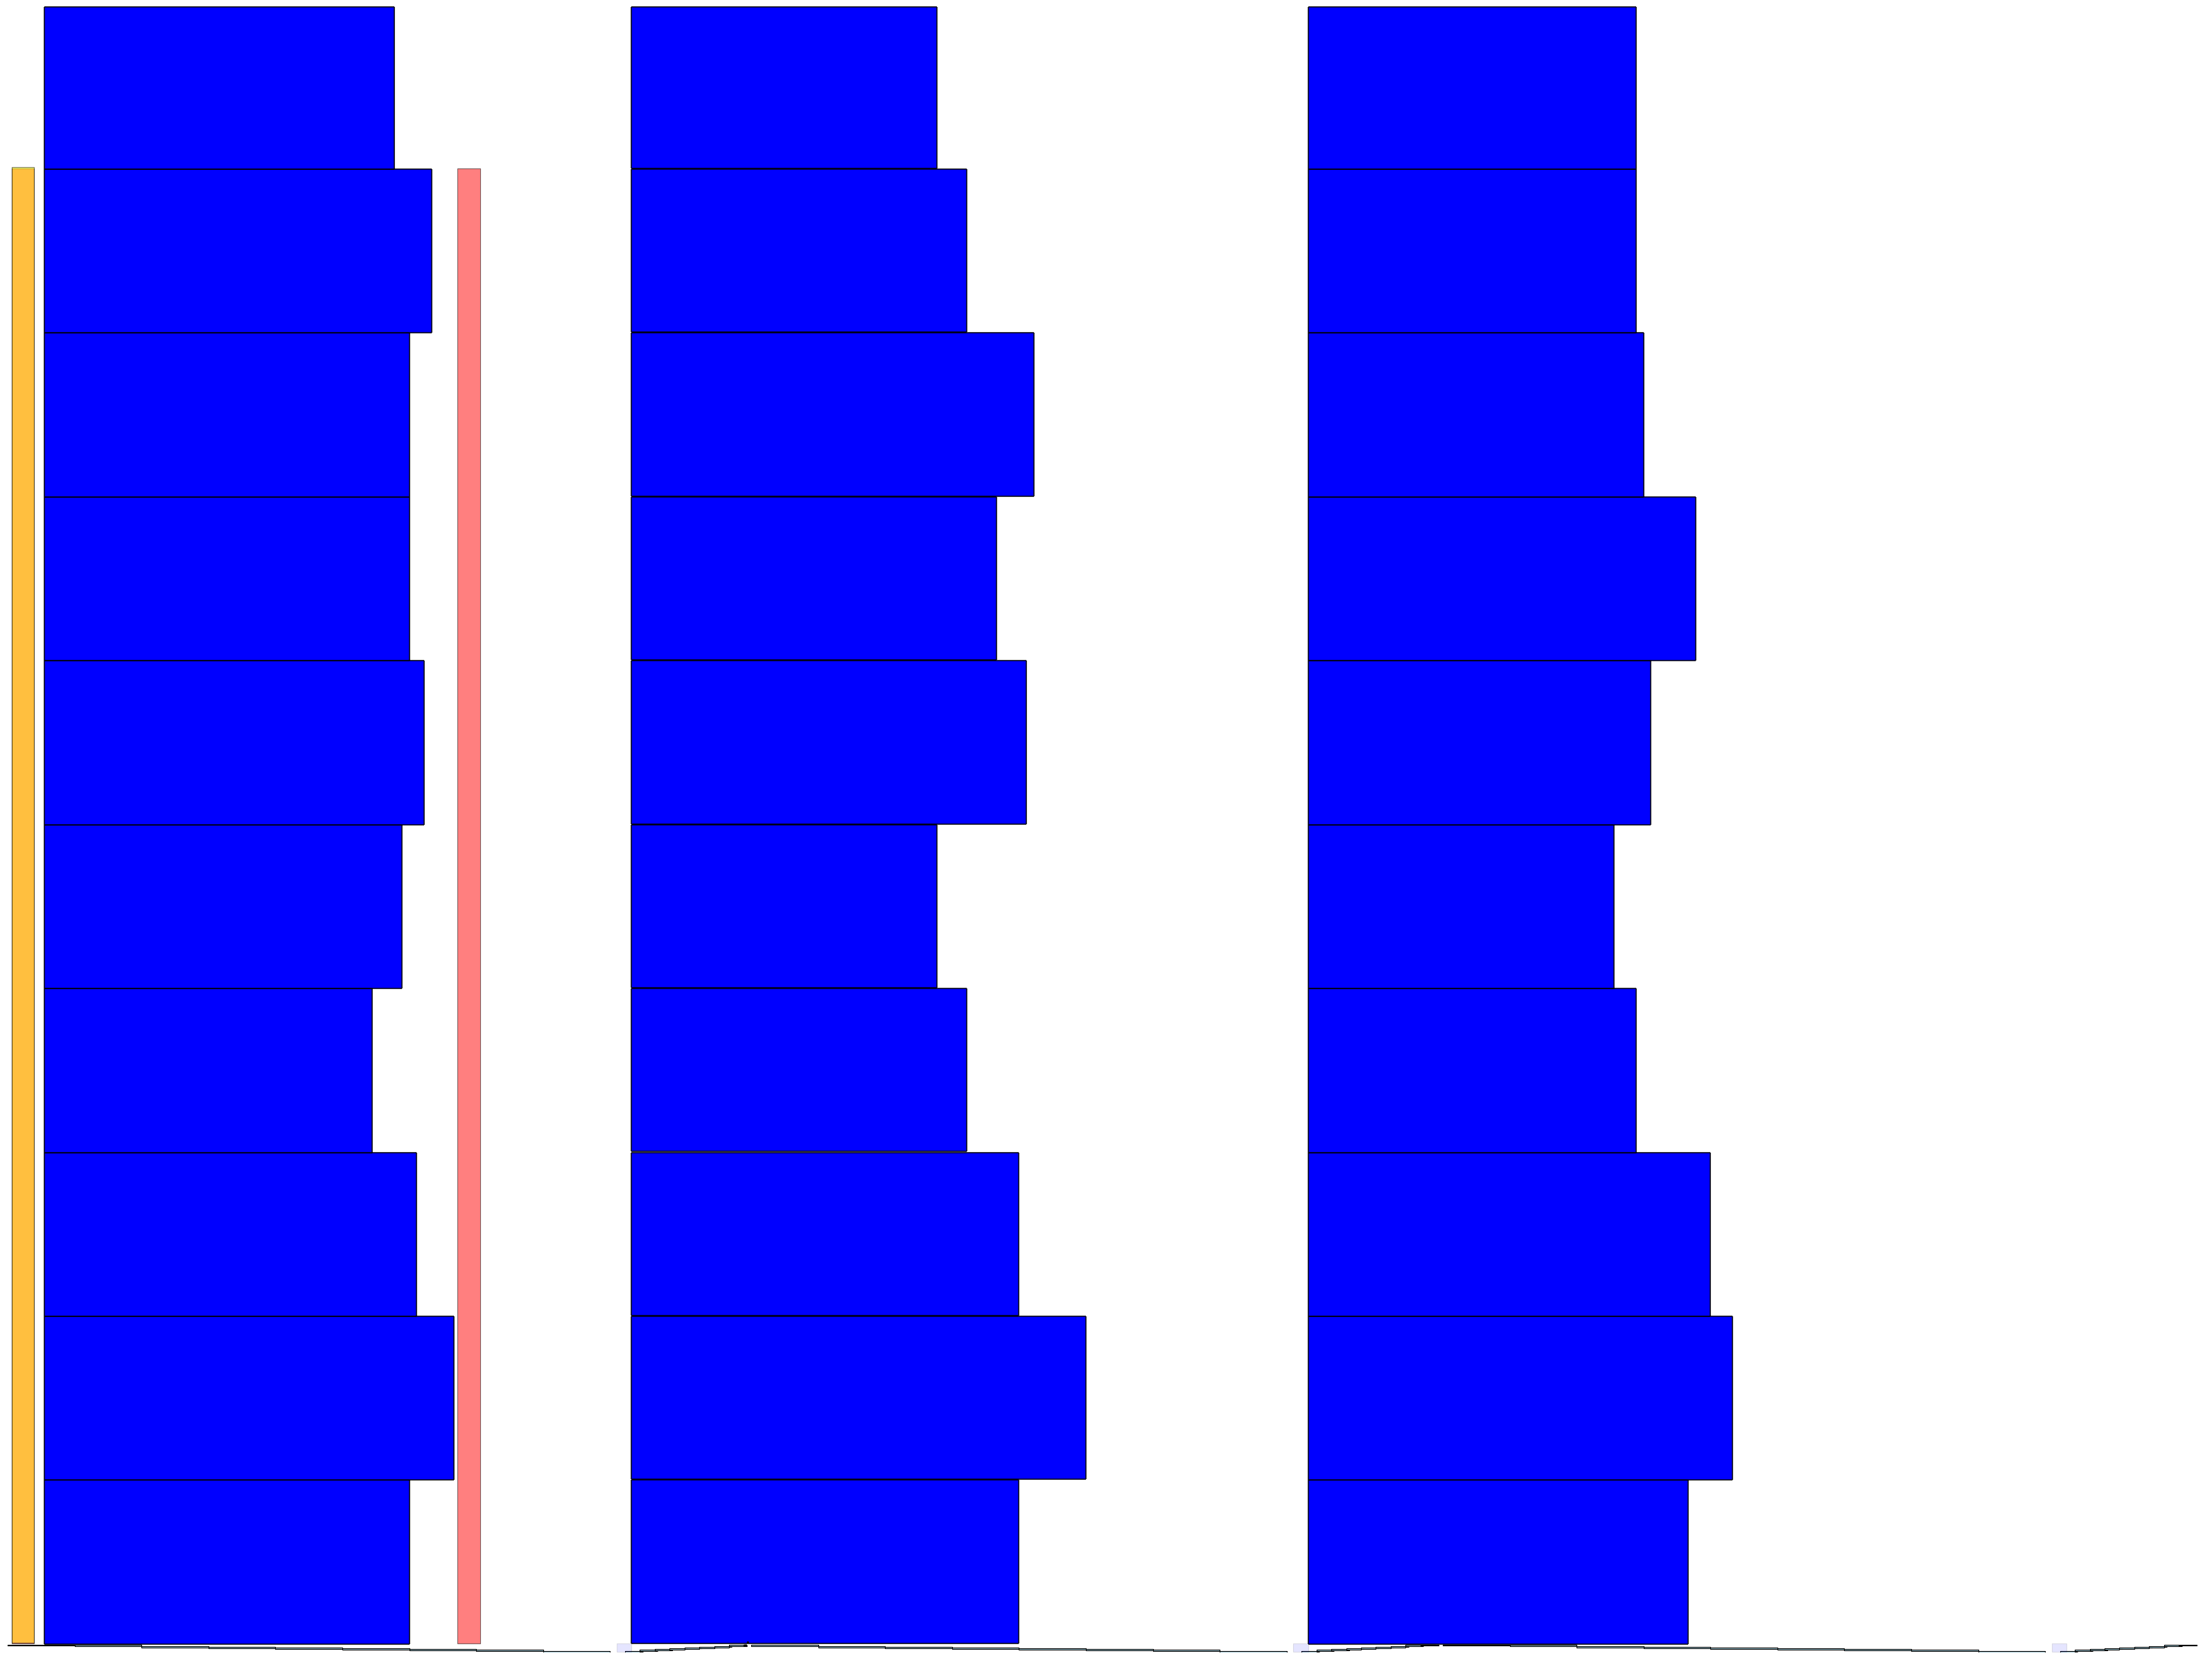

293


In [9]:
QPU_assignment = defaultdict(list)
tT = 2
tM = 1
tInter = 1
gate_cost = GateCost(tM,tT,tInter)

c = AbstractCircuit(0, {}, {})

for i in range(Ne):
    c.add_data("control", pos = i)
    QPU_assignment[0].append(c.data[i])

for i in range(num_QPU):
    for k in range(N//num_QPU):
        index = i*(N//num_QPU) + k
        c.add_data("target", pos = 2*index + Ne)
        QPU_assignment[i+1].append(c.data[2*index + Ne])

for i in range(num_QPU):
    for k in range(N//num_QPU):
        index = i*(N//num_QPU) + k
        c.add_data("working", pos = 2*index + 1 + Ne)
        QPU_assignment[i+1].append(c.data[2*index + Ne + 1])

control_qubits = []
target_qubits = []
working_qubits = []

# qubits are ordered as [all exponent qubits, [target qubits[i], working qubits[i] for i = 1:2000]
for i in range(Ne):
    control_qubits.append(c[i])

for i in range(N):
    target_qubits.append(c[2*i+Ne])
    working_qubits.append(c[2*i+1+Ne])


print(control_qubits[0].pos)

antena_assignment = defaultdict(list)
ghz_ancillas = defaultdict(list)

for i in range(num_QPU-1):
    c.insert_data("GHZ_a", Ne+2*i+2*N//num_QPU*i)
    c.insert_data("GHZ_a", Ne+2*i+2*N//num_QPU*i + 1)
    ghz_ancillas[i].append(c.data[Ne+2*i+2*N//num_QPU*i])
    ghz_ancillas[i].append(c.data[Ne+2*i+2*N//num_QPU*i + 1])

for i in range(num_QPU):
    c.insert_data("GHZ", Ne+2*i+(2*N//num_QPU + 2)*i)
    c.insert_data("GHZ", Ne+2*i+(2*N//num_QPU + 2)*i +  1)
    antena_assignment[i].append(c.data[Ne+2*i+(2*N//num_QPU + 2)*i])
    antena_assignment[i].append(c.data[Ne+2*i+(2*N//num_QPU + 2)*i + 1])

print(antena_assignment)
c.insert_data("antena_0", Ne)
antena_assignment[0].append(c.data[Ne])
print(len(antena_assignment), len(QPU_assignment))
c.lookup(table, control_qubits, target_qubits, QPU_assignment = QPU_assignment, 
         antena_assignment = antena_assignment, antena_ancilla = ghz_ancillas, decompose = False, gate_cost = gate_cost)
# c.add(target_qubits, working_qubits)
# print(c.count_gate())
# print(antena_assignment)
# c.draw_circuit(if_text=True, if_line=True)
drawer = CircuitDrawer()
drawer.data = c.data
drawer.ancilla = c.ancilla
drawer.draw_circuit(if_line=False, if_text=False)
print(c.depth() - 2*tInter)


In [169]:
# for i in range(len(c.data)):
    # print(c.data[i].depth)
print(c.data[0].gates)

{12: <QuantumGate.LogicalGate object at 0x000000002AD666D0>, 27: <QuantumGate.LogicalGate object at 0x00000000074CF710>, 30: <QuantumGate.LogicalGate object at 0x000000002F65FCD0>, 44: <QuantumGate.LogicalGate object at 0x000000002F65C110>, 55: <QuantumGate.LogicalGate object at 0x000000002F65EC90>, 67: <QuantumGate.LogicalGate object at 0x000000002F65C9D0>, 70: <QuantumGate.LogicalGate object at 0x000000002F65F390>, 84: <QuantumGate.LogicalGate object at 0x000000002F65E190>, 103: <QuantumGate.LogicalGate object at 0x000000002F65DF10>, 116: <QuantumGate.LogicalGate object at 0x000000002F65E990>, 119: <QuantumGate.LogicalGate object at 0x000000002F65C550>, 132: <QuantumGate.LogicalGate object at 0x000000002F65E390>, 143: <QuantumGate.LogicalGate object at 0x000000002F65C610>, 159: <QuantumGate.LogicalGate object at 0x000000002AF412D0>, 162: <QuantumGate.LogicalGate object at 0x000000002AF43BD0>, 174: <QuantumGate.LogicalGate object at 0x000000002AF40910>}


In [16]:
c = AbstractCircuit(0, {}, {})
# allocate all data qubits
# for i in range(2*N+Ne):
#     c.add_data()

for i in range(Ne):
    c.add_data("control", pos = i)
    QPU_assignment[0].append(c.data[i])

for i in range(num_QPU):
    for k in range(N//num_QPU):
        index = i*(N//num_QPU) + k
        c.add_data("target", pos = 2*index + Ne)
        QPU_assignment[i+1].append(c.data[2*index + Ne])

for i in range(num_QPU):
    for k in range(N//num_QPU):
        index = i*(N//num_QPU) + k
        c.add_data("working", pos = 2*index + 1 + Ne)
        QPU_assignment[i+1].append(c.data[2*index + Ne + 1])

control_qubits = []
target_qubits = []
working_qubits = []

# qubits are ordered as [all exponent qubits, [target qubits[i], working qubits[i] for i = 1:2000]
for i in range(Ne):
    control_qubits.append(c[i])

for i in range(N):
    target_qubits.append(c[2*i+Ne])
    working_qubits.append(c[2*i+1+Ne])


print(control_qubits[0].pos)


# table = {1:35, 2: 60, 3:43}
# table = {2:2**9-2, 3:2**9-1}
# table = {}
## Use this setting to draw the circuit
# for i in range(3):
#     num = getrandbits(N)
#     table[i] = num

# table = {0:1, 1:3, 2: 5, 3:7}

antena_assignment = defaultdict(list)
ghz_ancillas = defaultdict(list)

for i in range(num_QPU-1):
    c.insert_data("GHZ_a", Ne+2*i+2*N//num_QPU*i)
    c.insert_data("GHZ_a", Ne+2*i+2*N//num_QPU*i + 1)
    ghz_ancillas[i].append(c.data[Ne+2*i+2*N//num_QPU*i])
    ghz_ancillas[i].append(c.data[Ne+2*i+2*N//num_QPU*i + 1])

for i in range(num_QPU):
    c.insert_data("GHZ", Ne+2*i+(2*N//num_QPU + 2)*i)
    c.insert_data("GHZ", Ne+2*i+(2*N//num_QPU + 2)*i +  1)
    antena_assignment[i].append(c.data[Ne+2*i+(2*N//num_QPU + 2)*i])
    antena_assignment[i].append(c.data[Ne+2*i+(2*N//num_QPU + 2)*i + 1])

c.insert_data("antena_0", Ne)
antena_assignment[0].append(c.data[Ne])
print(len(antena_assignment), len(QPU_assignment))
c.lookup(table, control_qubits, target_qubits, QPU_assignment = QPU_assignment, 
         antena_assignment = antena_assignment, antena_ancilla = ghz_ancillas, decompose = True)
# c.add(target_qubits, working_qubits)
# print(c.count_gate())
# print(antena_assignment)
c.draw_circuit(if_text=True, if_line=True)
print(c.depth())

0
3 4
loading 0th number
loading 1th number
loading 2th number
loading 3th number
loading 4th number
loading 5th number
loading 6th number
loading 7th number
loading 8th number
loading 9th number
loading 10th number
loading 11th number
loading 12th number
loading 13th number
loading 14th number
loading 15th number


c:\Users\24835\Desktop\homework\uiuc\Covey\D-QPE\code\DShor\AbstractCircuit\AbstractCircuit.py:281: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((x, y - 0.2), 0.4, 0.4,
c:\Users\24835\Desktop\homework\uiuc\Covey\D-QPE\code\DShor\AbstractCircuit\AbstractCircuit.py:235: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([x, x], [y_control, y_target], 'k-', linewidth=1, color = gate_color)
c:\Users\24835\Desktop\homework\uiuc\Covey\D-QPE\code\DShor\AbstractCircuit\AbstractCircuit.py:236: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x, y_control, 'ko', markersize=6, color = gate_color)
c:\Users\24835\Desktop\homework\uiuc\Covey\D-QPE\code\DShor\AbstractCircuit\AbstractCircuit.py

217


In [ ]:
QPU_lst = []
QPUe = QPU([])
QPUe.add_register(QPU_assignment[0], c)
QPU_lst.append(QPUe)
for i in range(1, num_QPU + 1):
    if i == num_QPU:
        qubits = QPU_assignment[i] + antena_assignment[i - 1]
    else:
        qubits = QPU_assignment[i] + antena_assignment[i - 1] + ghz_ancillas[i - 1]
    cur_QPU = QPU([])
    cur_QPU.add_register(qubits, c)
    QPU_lst.append(cur_QPU)


ValueError: register is already in the QPU

In [ ]:
print(QPU_lst[0].registers)
print(len(QPU_lst[0].registers))
print(QPU_lst[1].count(double_count = False))
# print(len(QPU_lst[1].registers))

[<AbstractRegister.DataRegister object at 0x000000003B6FBF50>, <AbstractRegister.AncillaRegister object at 0x000000003BCD7350>, <AbstractRegister.DataRegister object at 0x00000000347B6890>, <AbstractRegister.AncillaRegister object at 0x000000003BA6B750>, <AbstractRegister.DataRegister object at 0x000000003BE92E50>, <AbstractRegister.AncillaRegister object at 0x000000003BCD5BD0>, <AbstractRegister.DataRegister object at 0x000000003BE93090>]
7
defaultdict(<class 'int'>, {'Logical': 147, 'AND': 9, 'UNAND': 9, 'CNOT': 18, 'Clear': 3})


In [ ]:
# This takes me less than 1 min
CNOT_count = np.zeros(len(QPU_lst))
for i in range(len(QPU_lst)):
    cur_QPU = QPU_lst[i]
    count = cur_QPU.count_connections()
    CNOT_count[i] = count["CNOT"]
print(CNOT_count)


[<AbstractRegister.DataRegister object at 0x000000003B6FBF50>, <AbstractRegister.AncillaRegister object at 0x000000003BCD7350>, <AbstractRegister.DataRegister object at 0x00000000347B6890>, <AbstractRegister.AncillaRegister object at 0x000000003BA6B750>, <AbstractRegister.DataRegister object at 0x000000003BE92E50>, <AbstractRegister.AncillaRegister object at 0x000000003BCD5BD0>, <AbstractRegister.DataRegister object at 0x000000003BE93090>]
[<AbstractRegister.DataRegister object at 0x000000003BE92B90>, <AbstractRegister.DataRegister object at 0x000000003BE92CD0>, <AbstractRegister.DataRegister object at 0x000000003BE92690>, <AbstractRegister.DataRegister object at 0x000000003BCACBD0>, <AbstractRegister.AncillaRegister object at 0x000000003BE9E590>, <AbstractRegister.DataRegister object at 0x000000003BCAC7D0>, <AbstractRegister.AncillaRegister object at 0x000000003A31AC50>, <AbstractRegister.DataRegister object at 0x000000003BC5AB50>, <AbstractRegister.AncillaRegister object at 0x0000000

Text(0, 0.5, 'Tunneling CNOT from QPU_i')

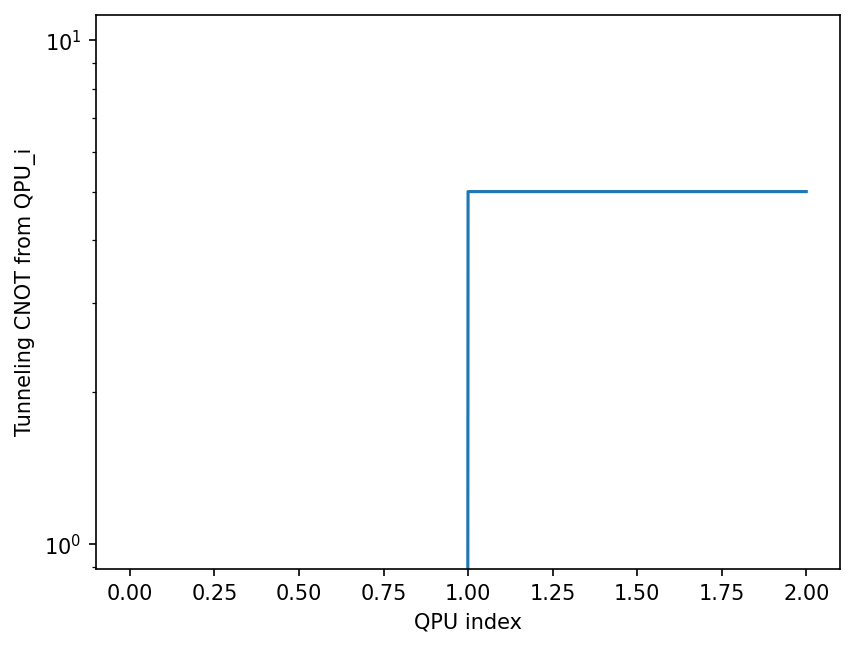

In [ ]:
plt.semilogy(CNOT_count)
plt.xlabel("QPU index")
plt.ylabel("Tunneling CNOT from QPU_i")

In [ ]:
T_count = np.zeros(21)
for i in range(len(QPU_lst)):
    cur_QPU = QPU_lst[i]
    count = cur_QPU.count_T()
    T_count[i] = count
print(T_count)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Text(0, 0.5, 'T count from QPU_i')

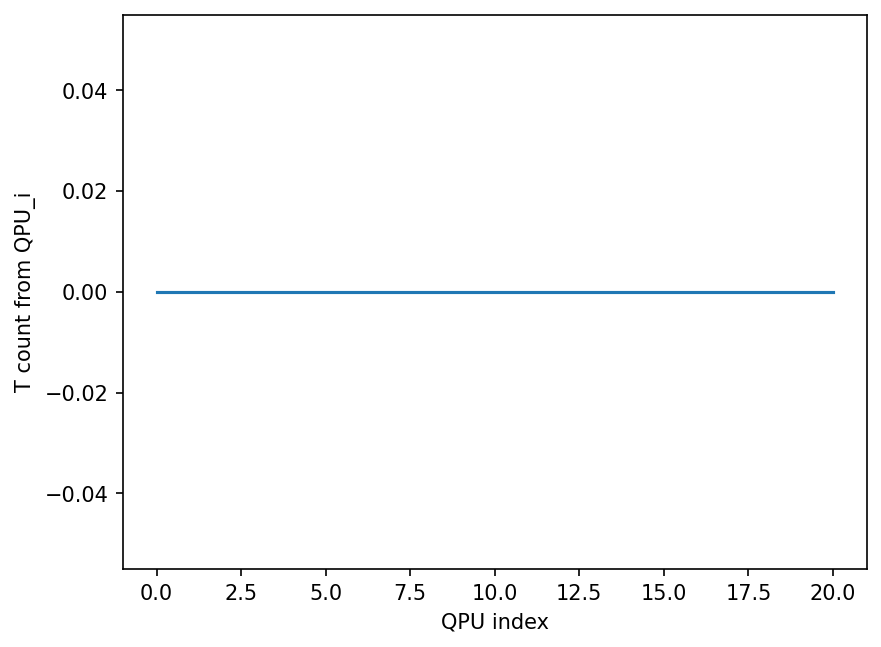

In [ ]:
plt.plot(T_count)
plt.xlabel("QPU index")
plt.ylabel("T count from QPU_i")

In [ ]:
# length = 5
# N = 8
# c = AbstractCircuit(0, {}, {})
# working_qubits = []
# target_qubits = []
# for i in range(N):
#     c.add_data()
# for i in range(N//2):
#     working_qubits.append(c[2*i+1])
#     target_qubits.append(c[2*i])
# table = {0:1, 1:2, 2:3, 3:4, 4:5, 5:5, 6:6, 7:7}
# # c.lookup(table, control_qubits, target_qubits)
# c.add(target_qubits, working_qubits)
# c.draw_circuit()

In [ ]:
all_depth = []
for pos, qubit in c.data.items():
    all_depth.append(qubit.depth)
print(max(all_depth))

229
